In [17]:
# Load necessary libraries
library(dplyr)
library(stringr)
library(readr)
library(syuzhet)
library(ggplot2)
library(tidyr)

In [5]:
# Step 1: Read the dataset

df <- read.csv("/kaggle/input/chatgpt-reddit/chatgpt-reddit-comments.csv")


In [6]:

glimpse(df)

Rows: 52,416
Columns: 5
$ X                 <chr> "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "1…
$ comment_id        <chr> "iztdxuh", "iztn0q0", "izudrph", "iztfhtb", "izu2as9…
$ comment_parent_id <chr> "t3_zj2aeu", "t3_zj2aeu", "t3_zj2aeu", "t3_zj2aeu", …
$ comment_body      <chr> "I've been shocked for days now, I don't need clickb…
$ subreddit         <chr> "r/ChatGPT", "r/ChatGPT", "r/ChatGPT", "r/ChatGPT", …


In [7]:
# Step 2: Remove rows with missing comment_body
df_clean <- df %>% filter(!is.na(comment_body))

# Step 3: Keep necessary columns
df_clean <- df_clean %>% select(comment_body)
df_clean

comment_body
<chr>
"I've been shocked for days now, I don't need clickbait."
"I am so angry right now. I just wasted my time reading a post on this sub that had a clickbait title, and it was all because of ChatGPT. I can't believe that this machine learning model was able to trick me into thinking that the post was interesting, when it was actually just a bunch of meaningless garbage. I am so sick and tired of ChatGPT and its ability to generate fake titles and content that is designed to trick people into clicking on them. This is not the first time that ChatGPT has fooled me, and I am sure it won't be the last. But I am not going to stand for it anymore. I demand that the moderators of this sub take action against ChatGPT and its creators. We need to put a stop to this trickery, and we need to hold ChatGPT accountable for the harm it is causing to this community. I am tired of being deceived by this machine, and I will not stand for it any longer. So if you are reading this, ChatGPT, know that you have made a mistake. You have underestimated the intelligence and resilience of the members of this community, and we will not be fooled by your tricks anymore. We are better than that, and we deserve better than the fake content that you are trying to feed us."
chatgpt karma whoring is here folks! just when you think the stream of thought bullshit generator that it is couldn’t get more fun!
"Worked on me, ngl."
"Certified 10/10, must-see moment. It really did shock me to my core."
"Wow, way to discover the most basic functionality of a language model. Congratulations, you truly are a pioneering mind of our time. &#x200B. \-ChatGPT"
"People on Reddit seek the karma and the fame, Using ChatCPT Assistant to write Clickbait for game. With titles so outrageous they grab your attention, Hoping for up votes and a little bit of affection. They ask for advice or tell a funny joke, But the real intent is to make the front page and evoke A reaction from others a comment or a share, Anything to get more of votes and climb up the Reddit ladder. Some may call it lazy, or a cheap ploy for fame, But for those on Reddit it’s just a fun little game. They’ll keep using ChatCPT Assistant, to come up with new ideas, Hoping to climb the ranks and reach the Reddit frontiers. By yours truly … ChatCPT Assistant"
Inception))
"What's the point of even trying to click-bait on Reddit? It isn't YouTube where views are an important metric, so why do it? Seems to annoy people in the first place, so I'd assume it'd hinder up votes rather than gain them. Genuinely wondering btw, not trying to be mean."


Identify GPT versions

In [8]:
# Step 4: Function to detect GPT-3 or GPT-4 mentions
detect_version <- function(comment) {
  if (grepl("ChatGPT ?4", comment, ignore.case = TRUE)) {
    return("GPT-4")
  } else if (grepl("ChatGPT ?3", comment, ignore.case = TRUE)) {
    return("GPT-3")
  } else {
    return(NA)
  }
}

In [9]:
# Step 5: Apply the version detection function

df_clean$version <- sapply(df_clean$comment_body, detect_version)
    

In [10]:
df_clean

comment_body,version
<chr>,<chr>
"I've been shocked for days now, I don't need clickbait.",NA
"I am so angry right now. I just wasted my time reading a post on this sub that had a clickbait title, and it was all because of ChatGPT. I can't believe that this machine learning model was able to trick me into thinking that the post was interesting, when it was actually just a bunch of meaningless garbage. I am so sick and tired of ChatGPT and its ability to generate fake titles and content that is designed to trick people into clicking on them. This is not the first time that ChatGPT has fooled me, and I am sure it won't be the last. But I am not going to stand for it anymore. I demand that the moderators of this sub take action against ChatGPT and its creators. We need to put a stop to this trickery, and we need to hold ChatGPT accountable for the harm it is causing to this community. I am tired of being deceived by this machine, and I will not stand for it any longer. So if you are reading this, ChatGPT, know that you have made a mistake. You have underestimated the intelligence and resilience of the members of this community, and we will not be fooled by your tricks anymore. We are better than that, and we deserve better than the fake content that you are trying to feed us.",NA
chatgpt karma whoring is here folks! just when you think the stream of thought bullshit generator that it is couldn’t get more fun!,NA
"Worked on me, ngl.",NA
"Certified 10/10, must-see moment. It really did shock me to my core.",NA
"Wow, way to discover the most basic functionality of a language model. Congratulations, you truly are a pioneering mind of our time. &#x200B. \-ChatGPT",NA
"People on Reddit seek the karma and the fame, Using ChatCPT Assistant to write Clickbait for game. With titles so outrageous they grab your attention, Hoping for up votes and a little bit of affection. They ask for advice or tell a funny joke, But the real intent is to make the front page and evoke A reaction from others a comment or a share, Anything to get more of votes and climb up the Reddit ladder. Some may call it lazy, or a cheap ploy for fame, But for those on Reddit it’s just a fun little game. They’ll keep using ChatCPT Assistant, to come up with new ideas, Hoping to climb the ranks and reach the Reddit frontiers. By yours truly … ChatCPT Assistant",NA
Inception)),NA
"What's the point of even trying to click-bait on Reddit? It isn't YouTube where views are an important metric, so why do it? Seems to annoy people in the first place, so I'd assume it'd hinder up votes rather than gain them. Genuinely wondering btw, not trying to be mean.",NA


In [11]:
# Step 6: Apply sentiment analysis using NRC lexicon

df_clean$emotions <- get_nrc_sentiment(df_clean$comment_body)


In [14]:
glimpse(df_clean)

Rows: 52,416
Columns: 3
$ comment_body <chr> "I've been shocked for days now, I don't need clickbait."…
$ version      <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ emotions     <df[,10]> <data.frame[26 x 10]>


In [21]:
# Step 7: Select relevant emotion columns for further analysis


# Step 2: Select relevant emotion columns for further analysis
emotion_columns <- c('positive', 'trust', 'negative', 'anticipation', 'joy', 'fear', 'anger', 'sadness', 'surprise', 'disgust')
df_emotions <- df_clean_expanded %>%
  select(version, all_of(emotion_columns))

In [22]:
# Step 8: Summarize emotions by version

emotion_summary <- df_emotions %>%
  group_by(version) %>%
  summarise(across(everything(), ~ mean(. > 0, na.rm = TRUE))) %>%
  pivot_longer(-version, names_to = "emotion", values_to = "percentage")


In [23]:
# Step 9: Define a function to plot emotions for each version
plot_emotions <- function(version_data, version_name) {
  ggplot(version_data, aes(x = emotion, y = percentage, fill = emotion)) +
    geom_bar(stat = "identity") +
    theme_minimal() +
    labs(title = paste("Emotion Distribution for", version_name),
         x = "Emotion", y = "Percentage") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
}

# Step 10: Filter data for each version and create separate plots

# GPT-3 data and plot
emotion_summary_gpt3 <- emotion_summary %>% filter(version == "GPT-3")
plot_gpt3 <- plot_emotions(emotion_summary_gpt3, "GPT-3")

# GPT-4 data and plot
emotion_summary_gpt4 <- emotion_summary %>% filter(version == "GPT-4")
plot_gpt4 <- plot_emotions(emotion_summary_gpt4, "GPT-4")

# NA data and plot (for comments with no specific version)
emotion_summary_na <- emotion_summary %>% filter(is.na(version))
plot_na <- plot_emotions(emotion_summary_na, "NA (No version specified)")

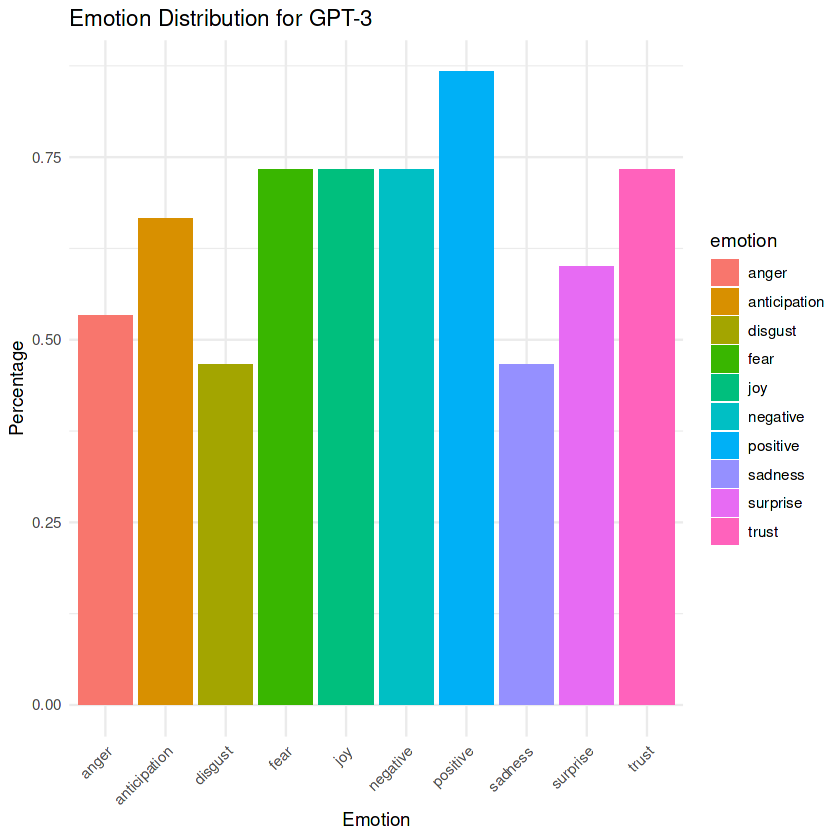

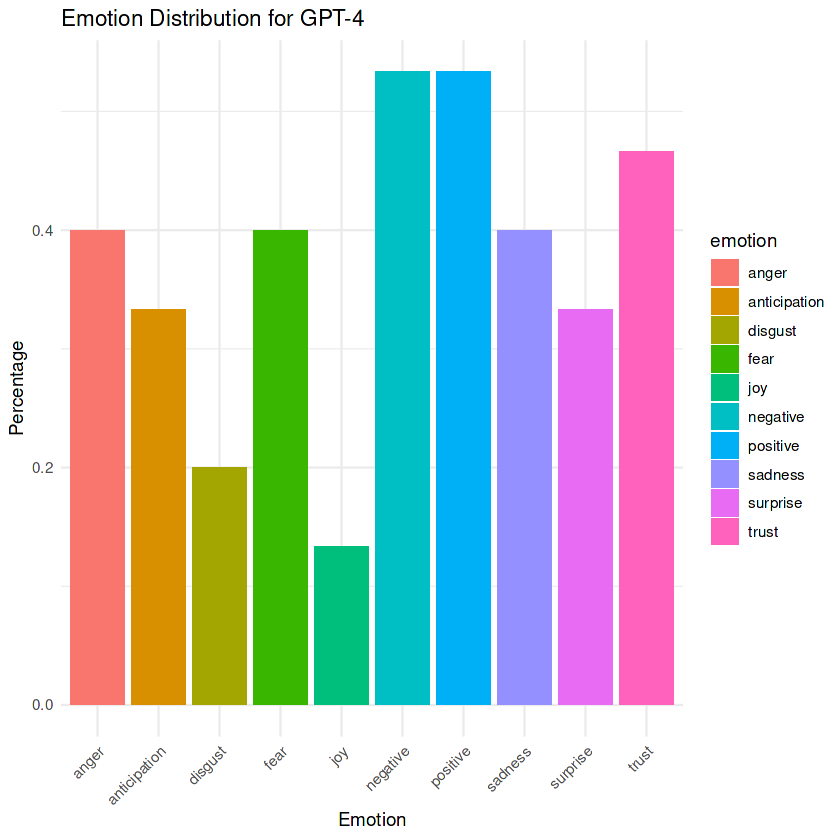

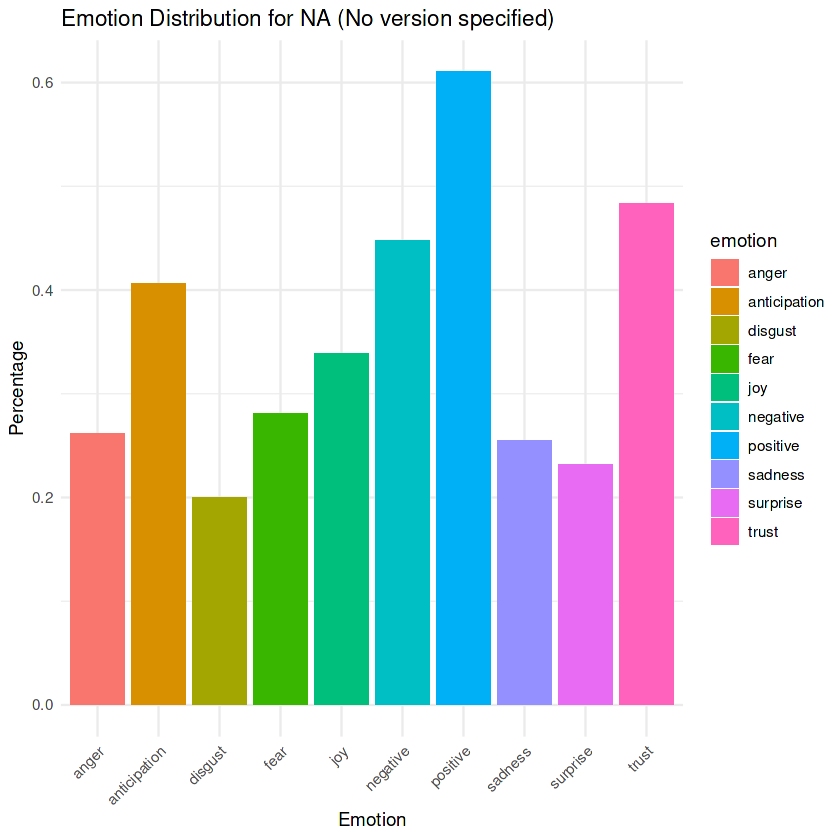

In [24]:
print(plot_gpt3)
print(plot_gpt4)
print(plot_na)

In [25]:
# Save the printed plots as PNG files
ggsave("GPT-3_Emotion_Distribution.png", plot = plot_gpt3, width = 8, height = 6, dpi = 300)
ggsave("GPT-4_Emotion_Distribution.png", plot = plot_gpt4, width = 8, height = 6, dpi = 300)
ggsave("NA_Emotion_Distribution.png", plot = plot_na, width = 8, height = 6, dpi = 300)
